In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Attribute Information
Input variables: Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Output variable(lable variable): Predict the rings of each abalone which will lead us to the age of that abalone

EDA for given dataset

In [3]:
df.shape

(4177, 9)

4177 rows & 9 columns

In [7]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


The first 10 rows of the dataframe is returned

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Float type, integer type & empty values are present in given data set

In [10]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Statistics Summary

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Key Obsevations:
    mean is more than the median (25 th percentile) in all the columns
    Data is not much scattered (Lenght, shell weight)
    There is a small difference in 75th percentile & other input values.
    Mean is higher than median (50th percentile) in whole weight, shucked weight,Viscera weight, Shell weight which  means data has skewness.
   
    

In [65]:
df.rename(columns={'Rings':'age'},inplace=True)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,NaN,0.5140,-1.493880,0.1010,0.1500,15
1,M,0.350,0.265,NaN,0.2255,-2.307598,0.0485,0.0700,7
2,F,0.530,0.420,NaN,0.6770,-1.360627,0.1415,0.2100,9
3,M,0.440,0.365,NaN,0.5160,-1.534794,0.1140,0.1550,10
4,I,0.330,0.255,NaN,0.2050,-2.413517,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,NaN,0.8870,-0.994252,0.2390,0.2490,11
4173,M,0.590,0.440,NaN,0.9660,-0.823256,0.2145,0.2605,10
4174,M,0.600,0.475,NaN,1.1760,-0.643405,0.2875,0.3080,9
4175,F,0.625,0.485,NaN,1.0945,-0.632993,0.2610,0.2960,10


Data is continous & linear regression is used

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [38]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

<AxesSubplot:>

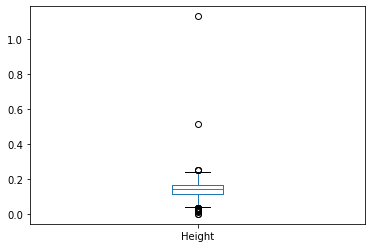

In [40]:
df['Height'].plot.box()

<AxesSubplot:>

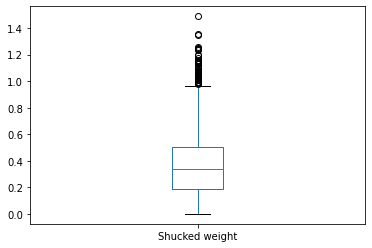

In [41]:
df['Shucked weight'].plot.box()

Length               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Diameter          AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Height            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Whole weight      AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Shucked weight    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Viscera weight    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Shell weight      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
age                     AxesSubplot(0.125,0.125;0.0945122x0.343182)
dtype: object

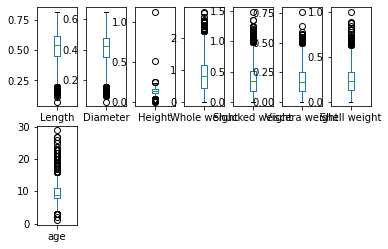

In [42]:
df.plot(kind='box',subplots=True, layout=(2,7))

In [46]:
#Removing outliers

from scipy.stats import boxcox


<AxesSubplot:ylabel='Frequency'>

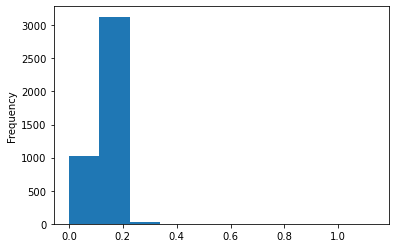

In [47]:
df['Height'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

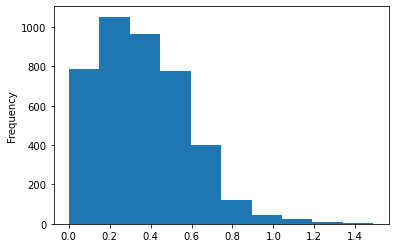

In [48]:
df['Shucked weight'].plot.hist()

In [56]:
df['Height']=np.log(df['Height'])

<AxesSubplot:ylabel='Frequency'>

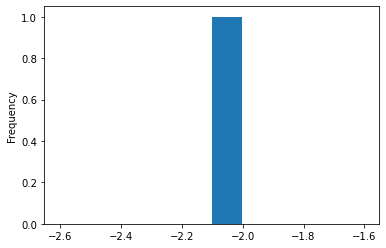

In [57]:
df['Height'].plot.hist()

#Visualization


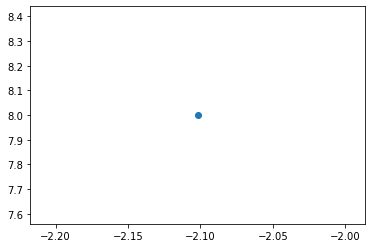

In [63]:
plt.scatter(df['Height'],df['age'])

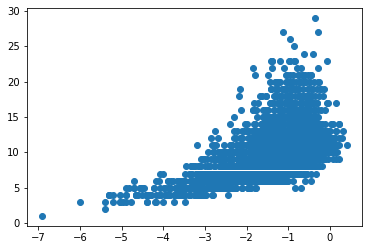

In [66]:
plt.scatter(df['Shucked weight'],df['age']) # negative impact)

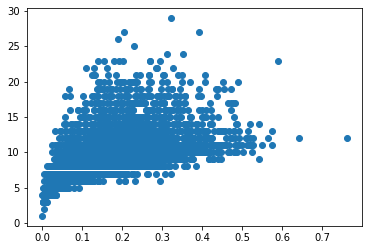

In [67]:
plt.scatter(df['Viscera weight'],df['age']) # positive impact

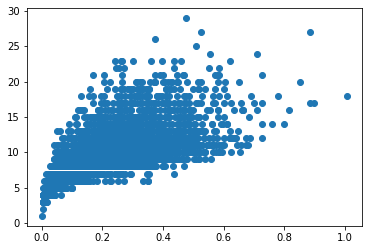

In [68]:
plt.scatter(df['Shell weight'],df['age'])

<function matplotlib.pyplot.show(close=None, block=None)>

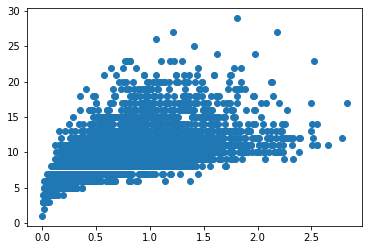

In [69]:
x=df['Whole weight'] # with increase in whole weight age increases
y=df['age']
plt.scatter(x,y)
plt.show

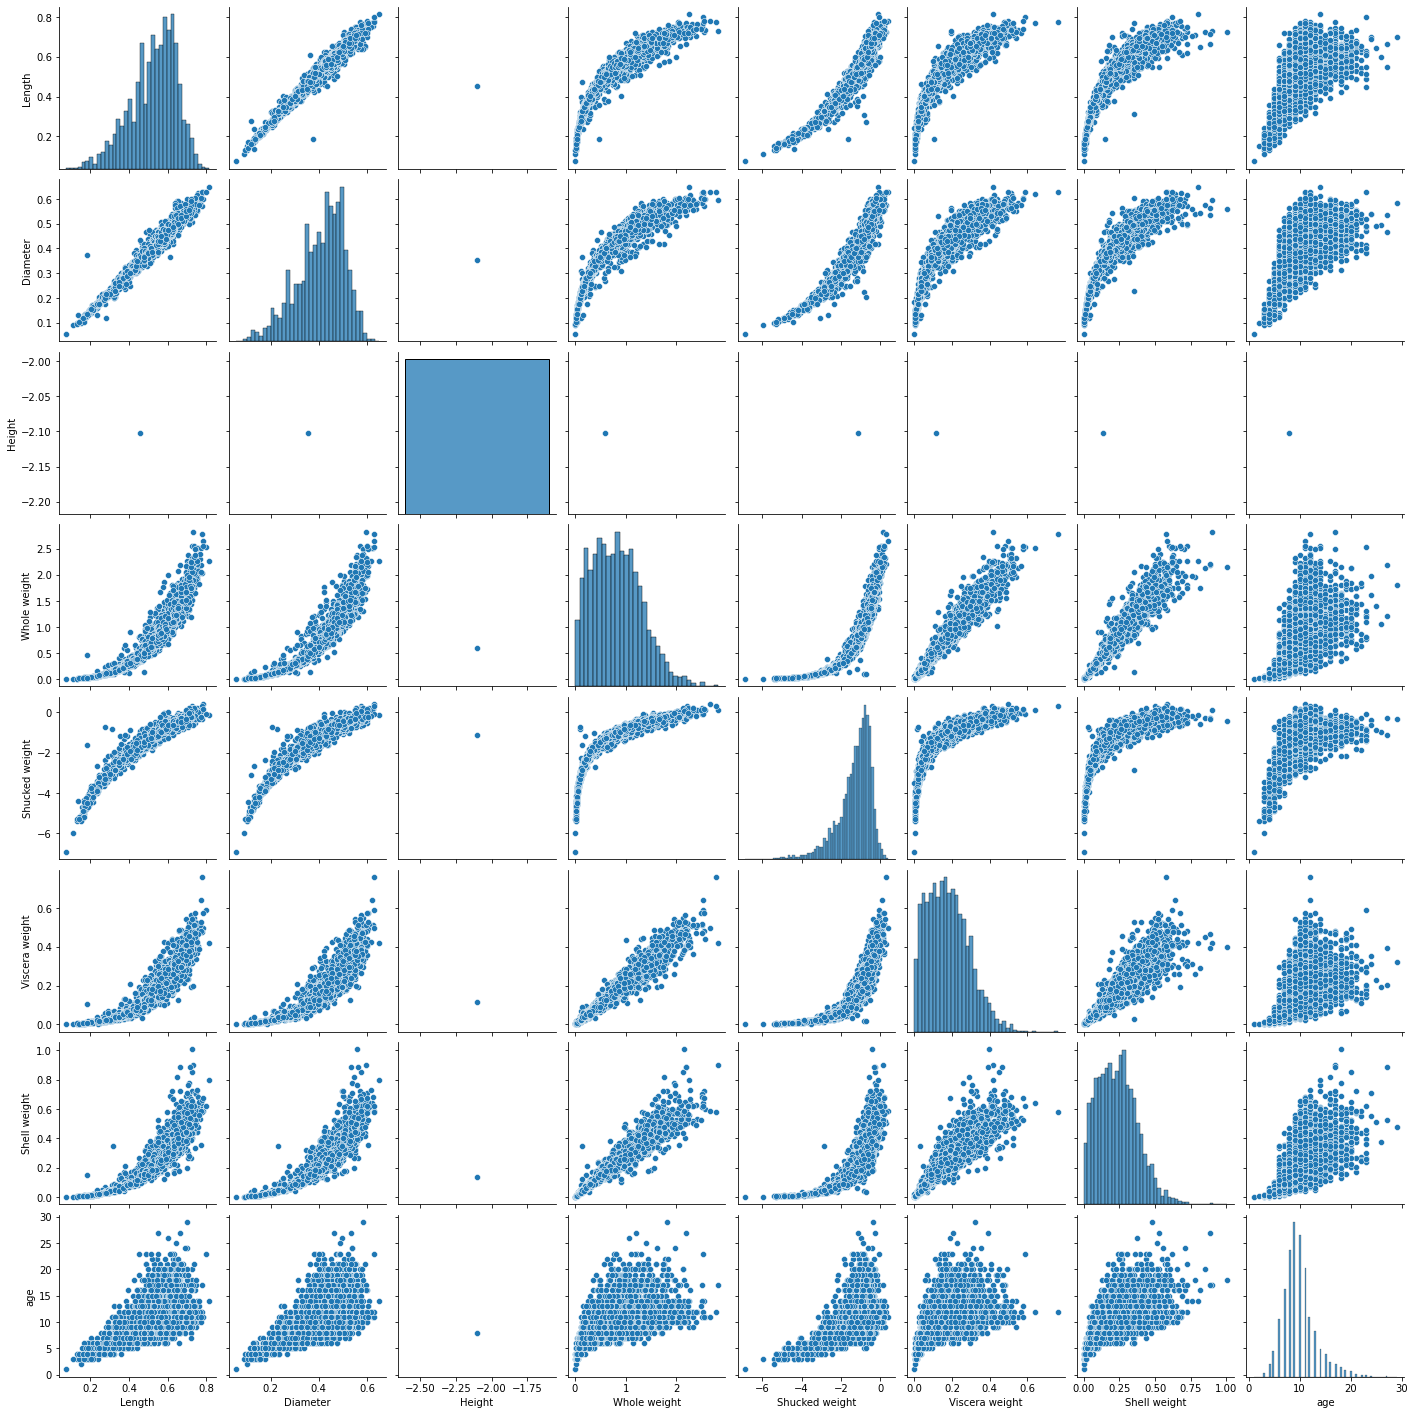

In [70]:
sns.pairplot(df)

# To check Correlation

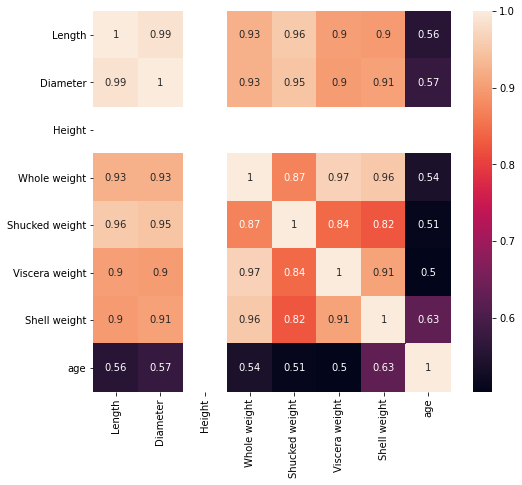

In [71]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

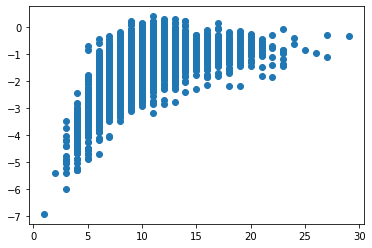

In [72]:
plt.scatter(df['age'],df['Shucked weight'])
plt.show()

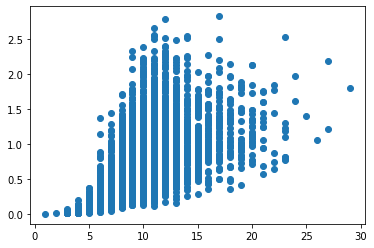

In [73]:
plt.scatter(df['age'],df['Whole weight'])
plt.show()

In [75]:
#drop data set
df.drop('Shucked weight',axis=1,inplace=True)

In [76]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,NaN,0.5140,0.1010,0.150,15
1,M,0.350,0.265,NaN,0.2255,0.0485,0.070,7
2,F,0.530,0.420,NaN,0.6770,0.1415,0.210,9
3,M,0.440,0.365,NaN,0.5160,0.1140,0.155,10
4,I,0.330,0.255,NaN,0.2050,0.0395,0.055,7
5,I,0.425,0.300,NaN,0.3515,0.0775,0.120,8
6,F,0.530,0.415,NaN,0.7775,0.1415,0.330,20
7,F,0.545,0.425,NaN,0.7680,0.1495,0.260,16
8,M,0.475,0.370,NaN,0.5095,0.1125,0.165,9
9,F,0.550,0.440,NaN,0.8945,0.1510,0.320,19


In [77]:
df['Height'].replace(np.NaN,df['Height'].mean,inplace=True)

In [78]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [81]:
df.shape

(4177, 8)

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]
threshold=3
np.where(z>3)

TypeError: unsupported operand type(s) for +: 'method' and 'method'

In [ ]:
Import label encoder

In [90]:
x=df.iloc[:,0:-1]
x.head()

RecursionError: maximum recursion depth exceeded in comparison

RecursionError: maximum recursion depth exceeded in comparison